In [1]:
import zipfile
import os

from google.colab import drive


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_file = '/content/drive/My Drive/mini_dataset.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir())

['.config', 'drive', 'mini_dataset', '__MACOSX', 'sample_data']


In [4]:
len(os.listdir('mini_dataset/arabic'))

2500

In [5]:
pip install tensorflow-io

In [6]:
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import warnings
warnings.filterwarnings('ignore')

In [7]:
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import activations

In [8]:
%%time
audio_data = ['mini_dataset/arabic/common_voice_ar_19058308.mp3', 'mini_dataset/audio/chinese/common_voice_zh-CN_18536137.mp3',
              'mini_dataset/audio/english/common_voice_en_37285574.mp3', 'mini_dataset/audio/italian/common_voice_it_17415772.mp3',
             'mini_dataset/audio/russian/common_voice_ru_18849018.mp3']
y, sr = [], []
dir_read = 'mini_dataset/arabic'
audio_data = os.listdir(dir_read)
for i in audio_data[:50]:
    y_temp, sr_temp = librosa.load(dir_read + '/' + i)
    y.append(y_temp)
    sr.append(sr_temp)
    # print(y[-1].shape, sr[-1])

CPU times: user 1.98 s, sys: 337 ms, total: 2.31 s
Wall time: 9.26 s


In [9]:
y[0]

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        1.0355857e-08, -5.9083329e-09,  0.0000000e+00], dtype=float32)

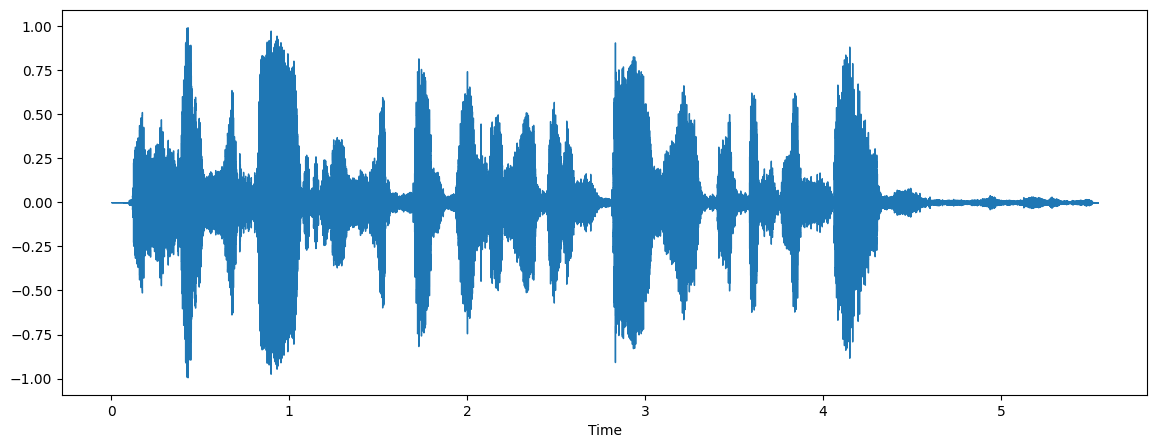

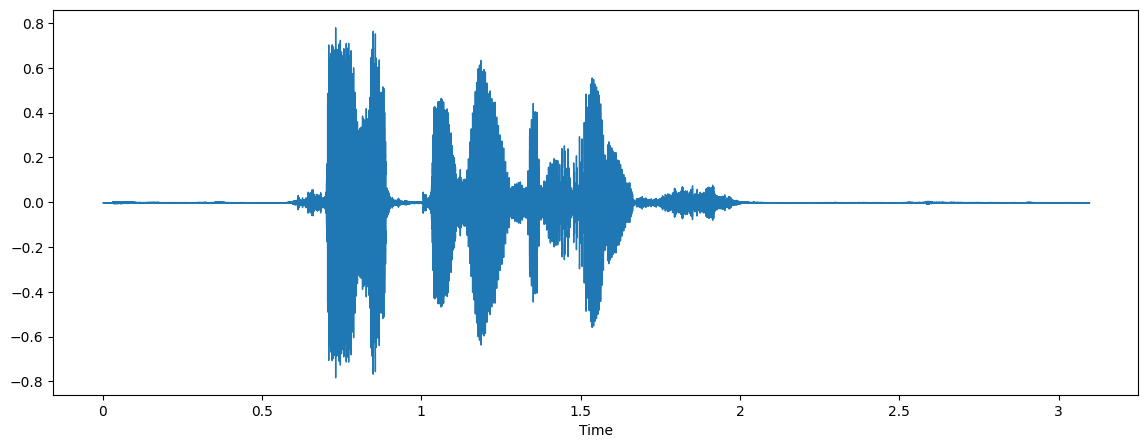

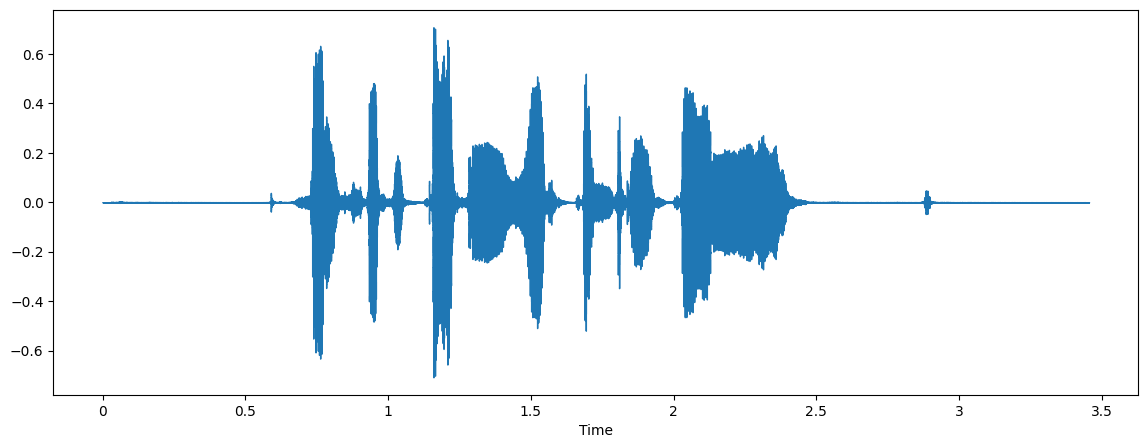

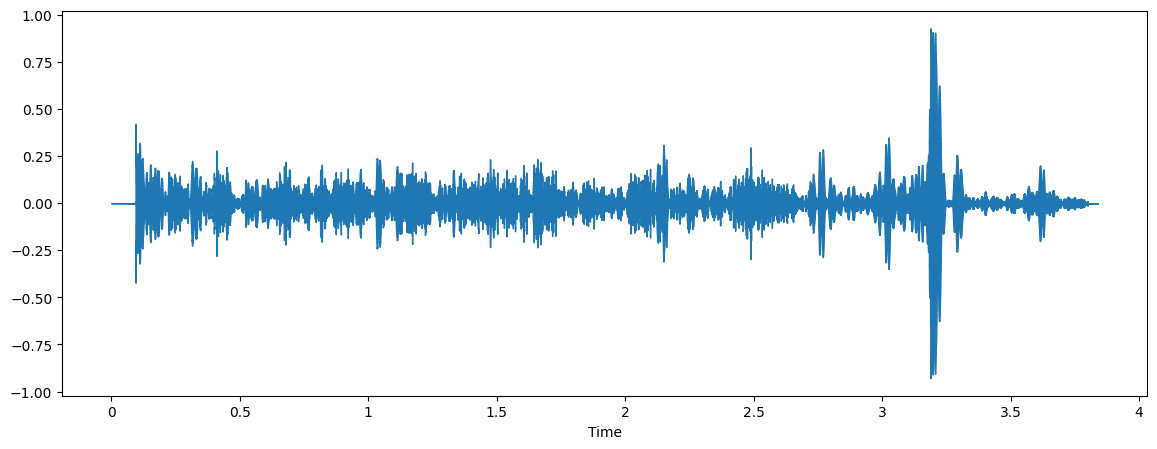

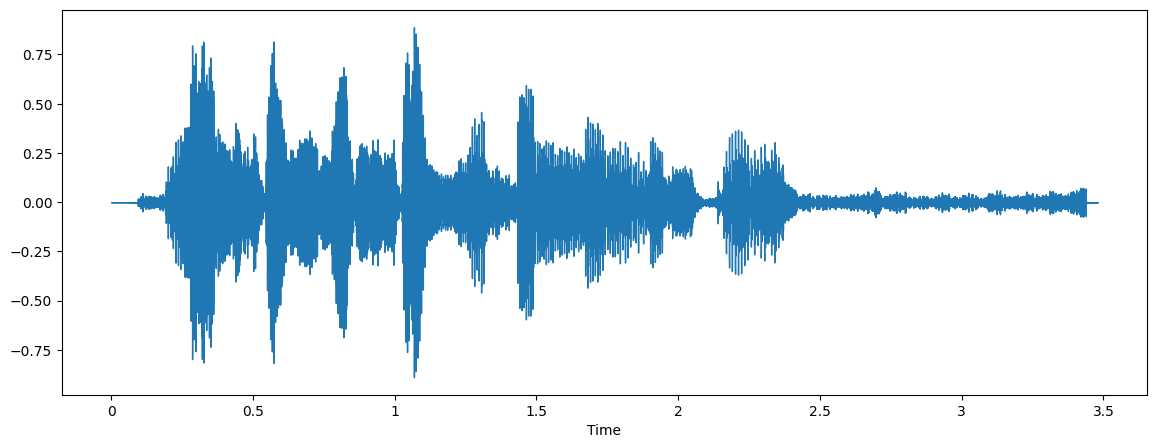

In [10]:
for i in range(len(y[:5])):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y[i], sr=sr[i])
    # display.Audio(audio_data[i])

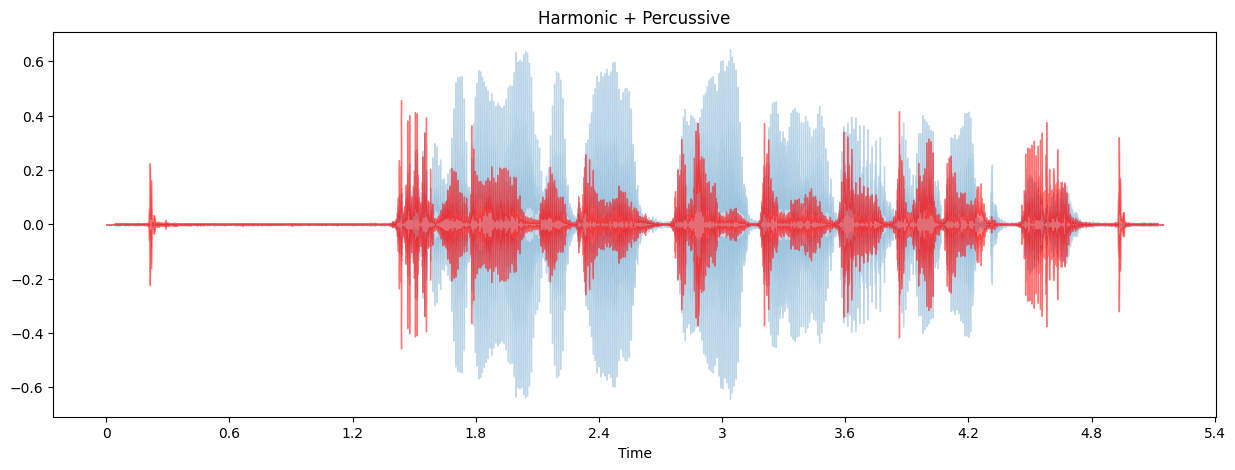

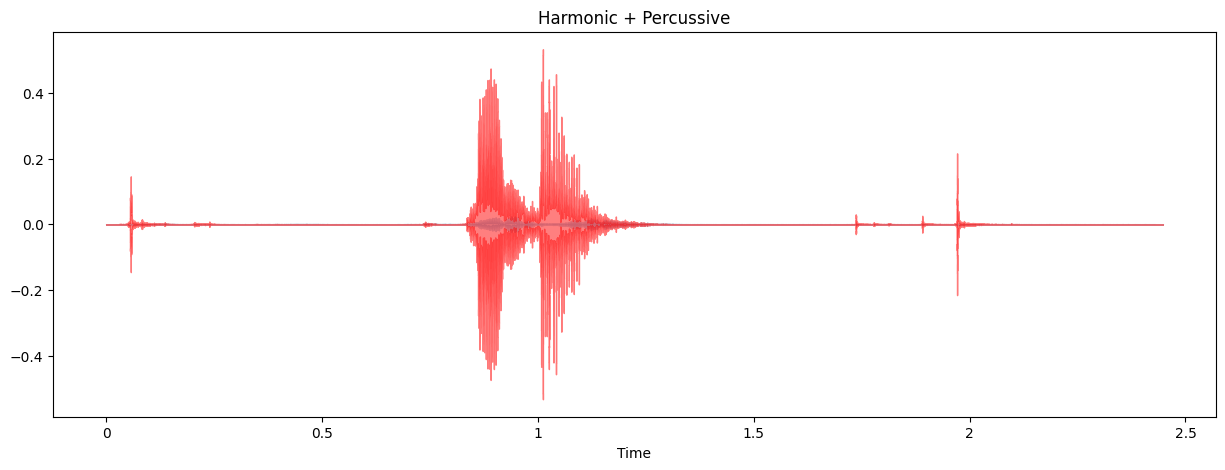

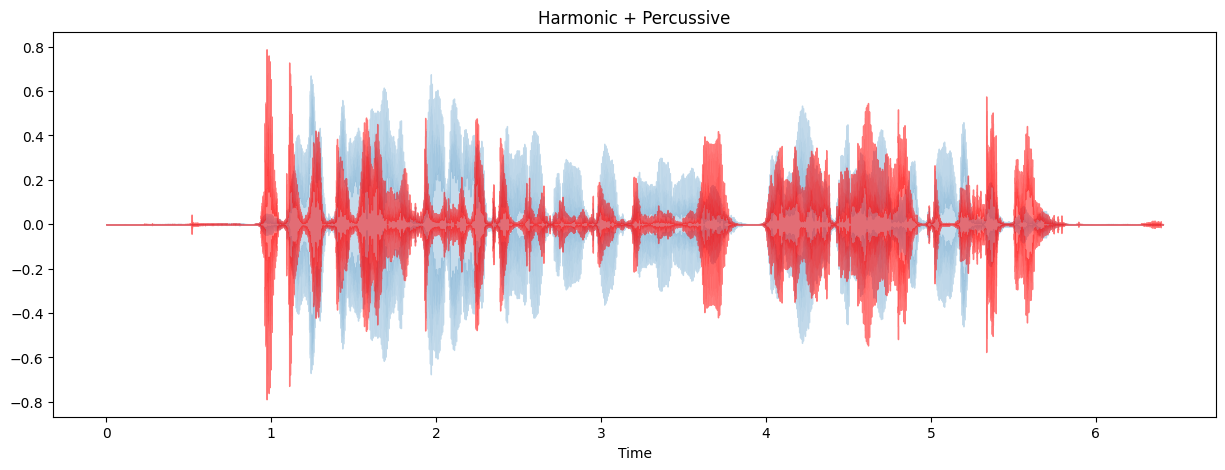

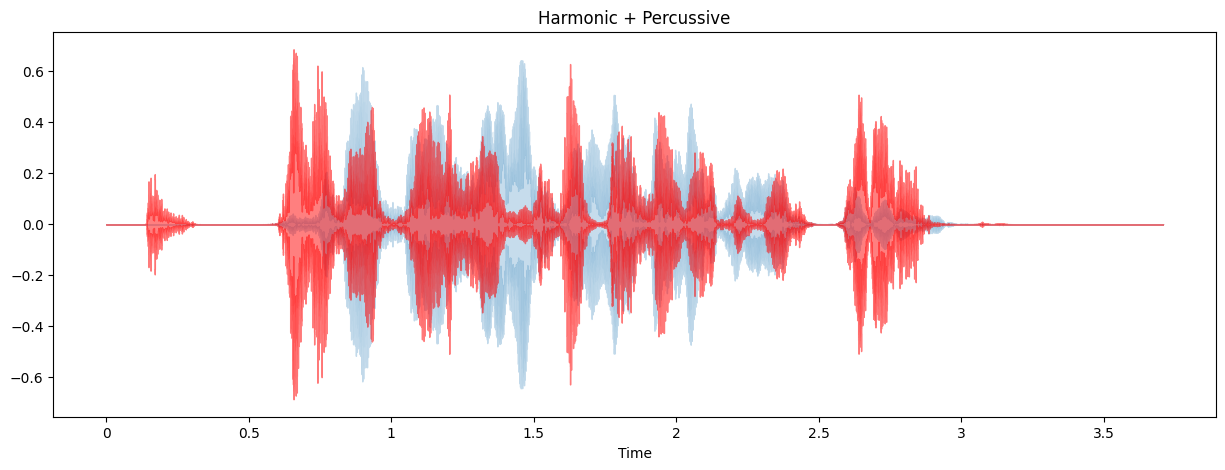

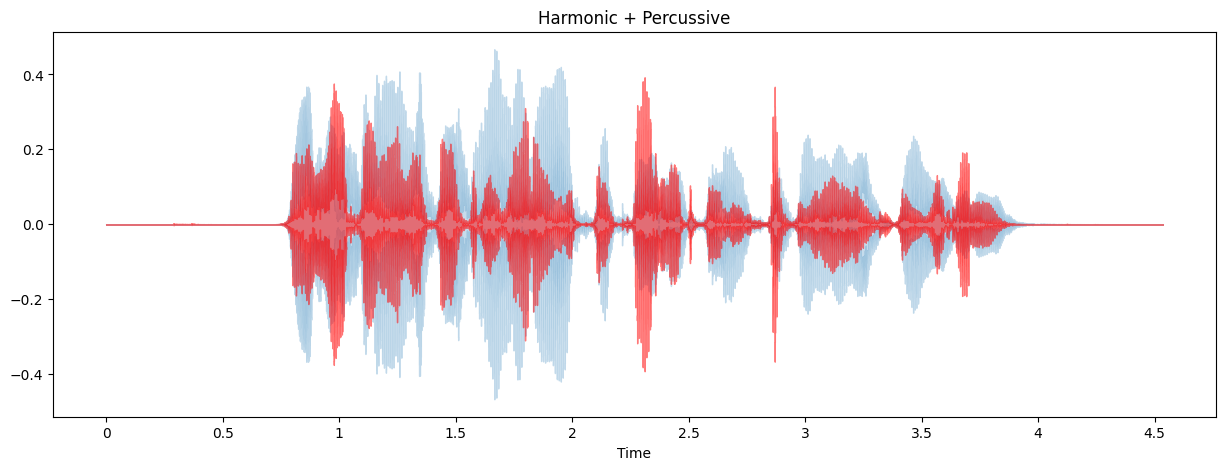

In [ ]:
y_harmonic, y_percussive = [], []
for i in range(len(y)):
    y_htemp, y_ptemp = librosa.effects.hpss(y[i])
    y_harmonic.append(y_htemp)
    y_percussive.append(y_ptemp)
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(y_harmonic[i], sr=sr[i], alpha=0.25)
    librosa.display.waveshow(y_percussive[i], sr=sr[i], color='r', alpha=0.5)
    plt.title('Harmonic + Percussive')

Detected Tempo: [172.265625] beats/min


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1600x900 with 0 Axes>

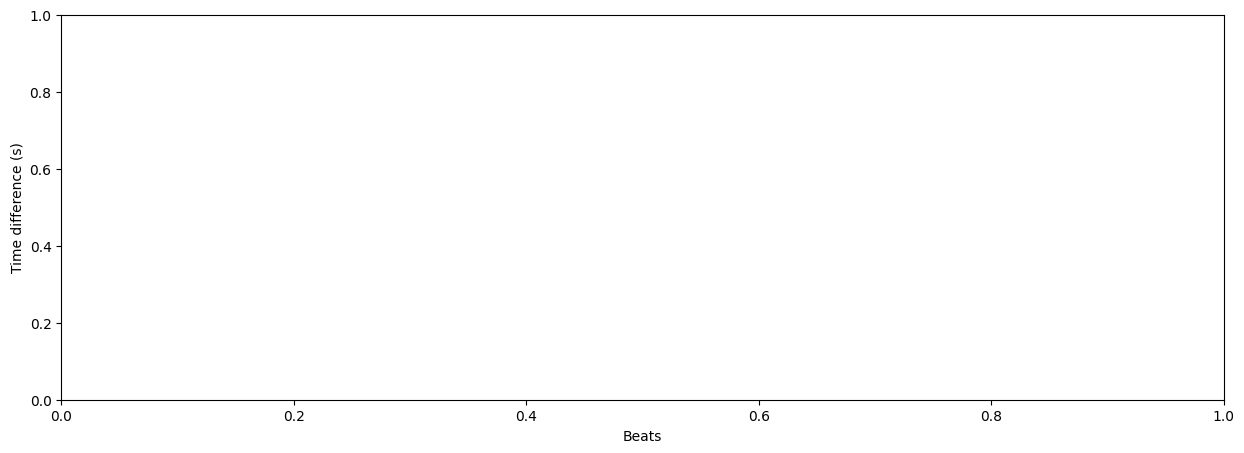

In [ ]:
for i in range(len(y)):
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive[i],sr=sr[i])
    print('Detected Tempo: ' + str(tempo) + ' beats/min')
    beat_times = librosa.frames_to_time(beat_frames, sr=sr[i])
    beat_time_diff=np.ediff1d(beat_times)
    beat_nums = np.arange(1, np.size(beat_times))
    plt.figure(figsize=(16, 9))
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 5)
    ax.set_ylabel("Time difference (s)")
    ax.set_xlabel("Beats")
    g=sns.barplot(beat_nums, beat_time_diff, palette="BuGn_d",ax=ax)
    g=g.set(xticklabels=[])

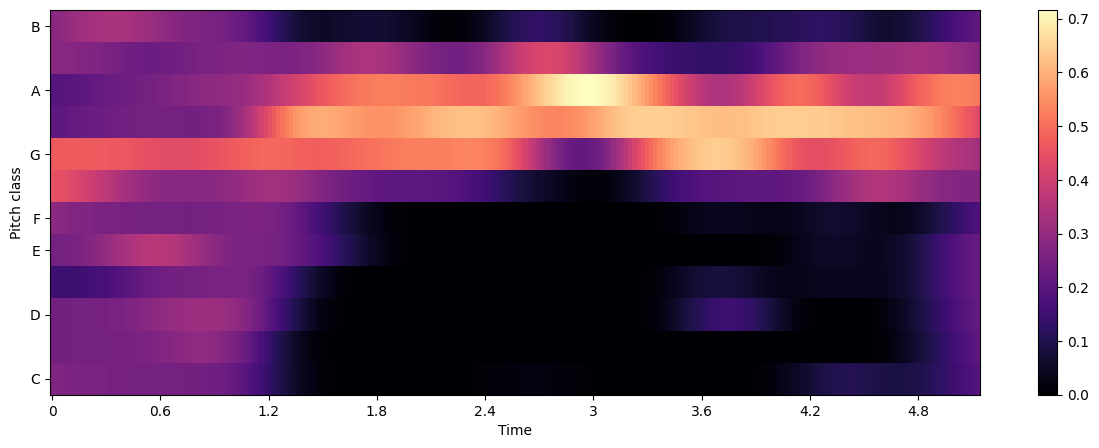

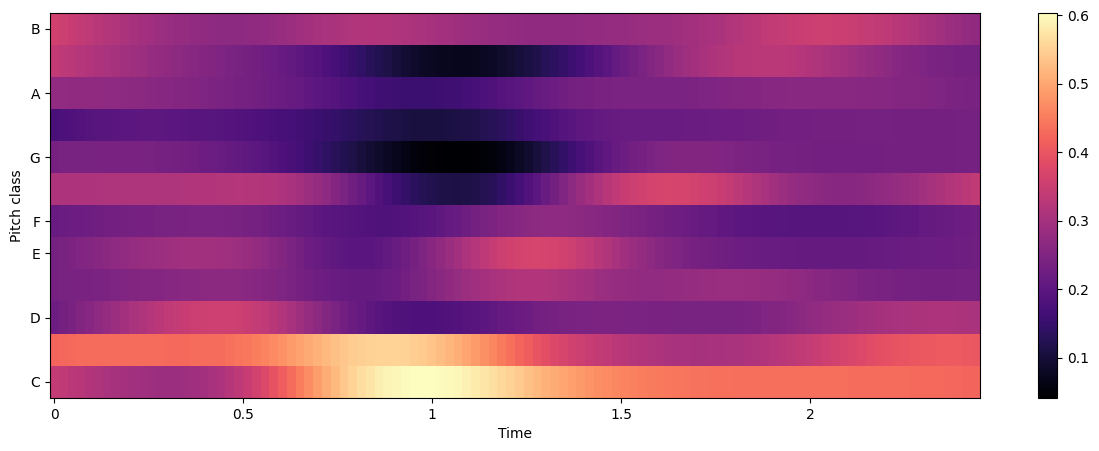

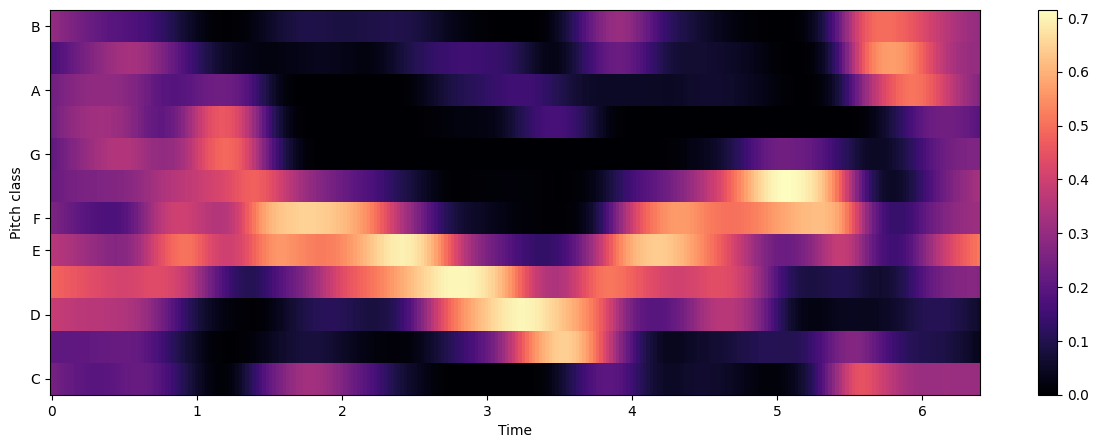

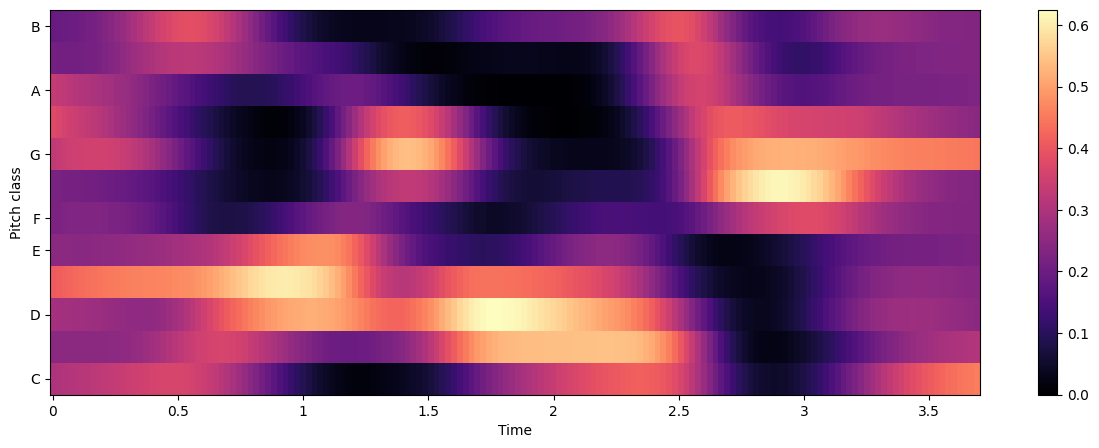

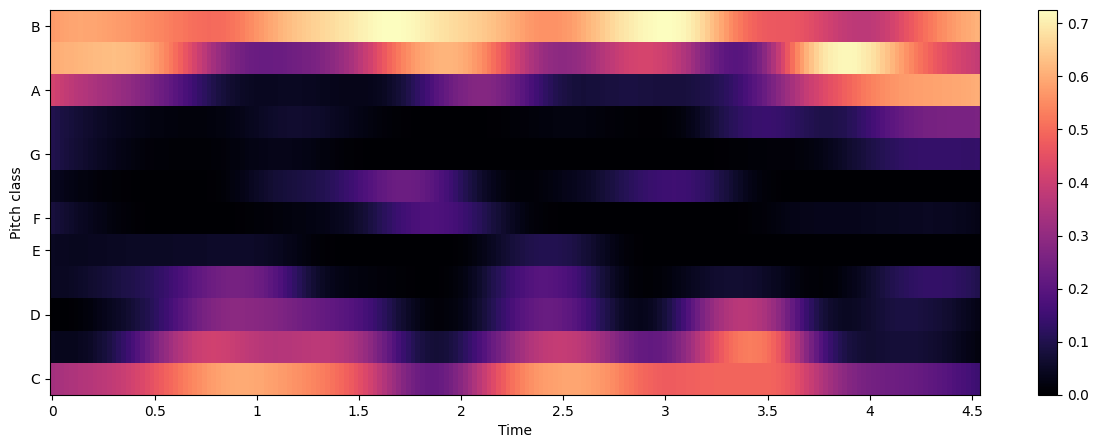

In [ ]:
for i in range(len(y)):
    chroma=librosa.feature.chroma_cens(y=y_harmonic[i], sr=sr[i])
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
    plt.colorbar()

In [ ]:
for i in range(len(y)):
    mfccs = librosa.feature.mfcc(y=y_harmonic[i], sr=sr[i], n_mfcc=20)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')

In [ ]:
mfccs

array([[-7.6063715e+02, -7.6063715e+02, -7.6063715e+02, ...,
        -7.6036578e+02, -7.6035358e+02, -7.6063715e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.8370106e-01,  4.0096983e-01,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.8361436e-01,  4.0088019e-01,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.7540966e-01,  3.9230528e-01,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.7440610e-01,  3.9125749e-01,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.7334618e-01,  3.9014894e-01,  0.0000000e+00]], dtype=float32)

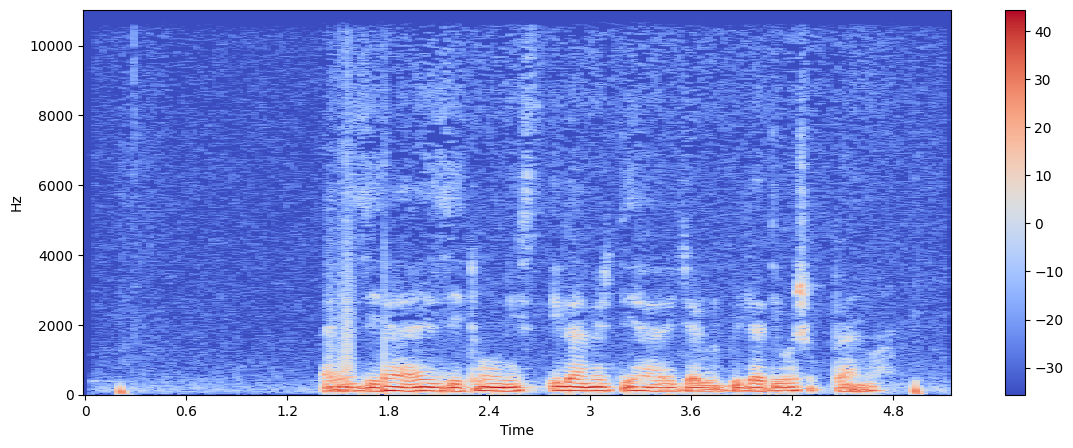

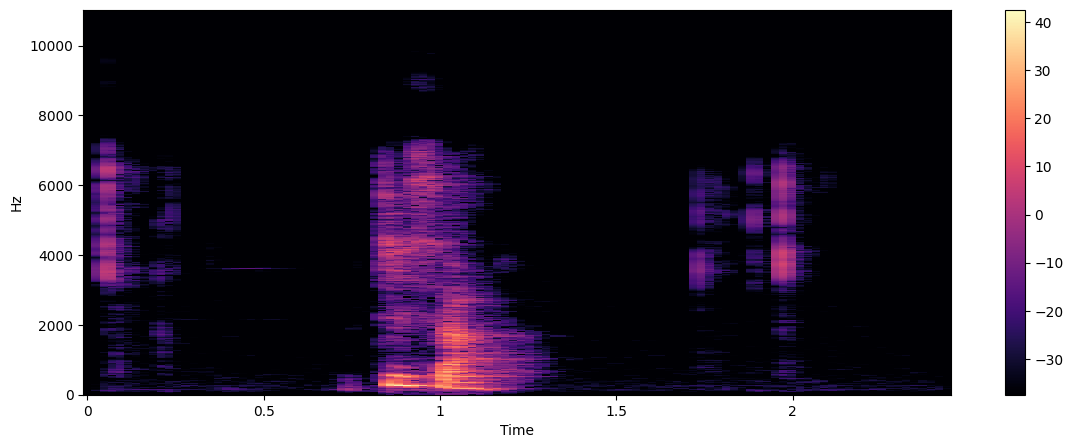

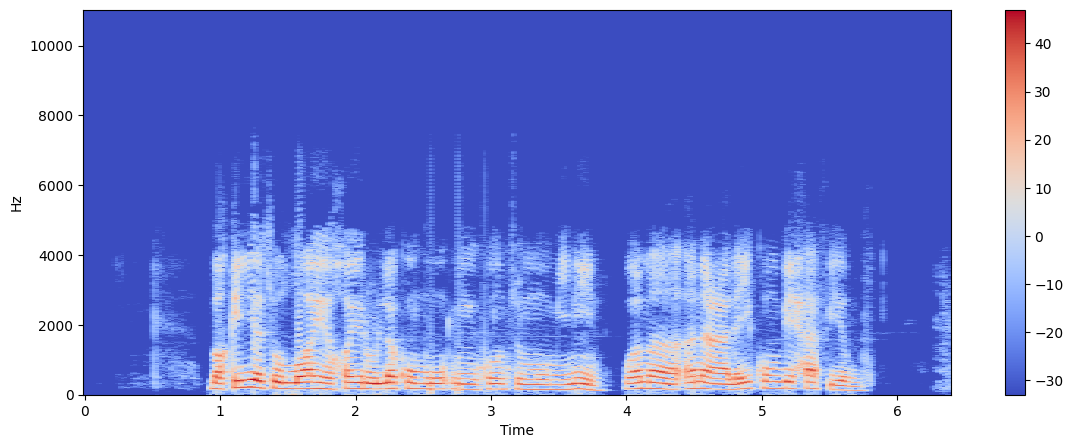

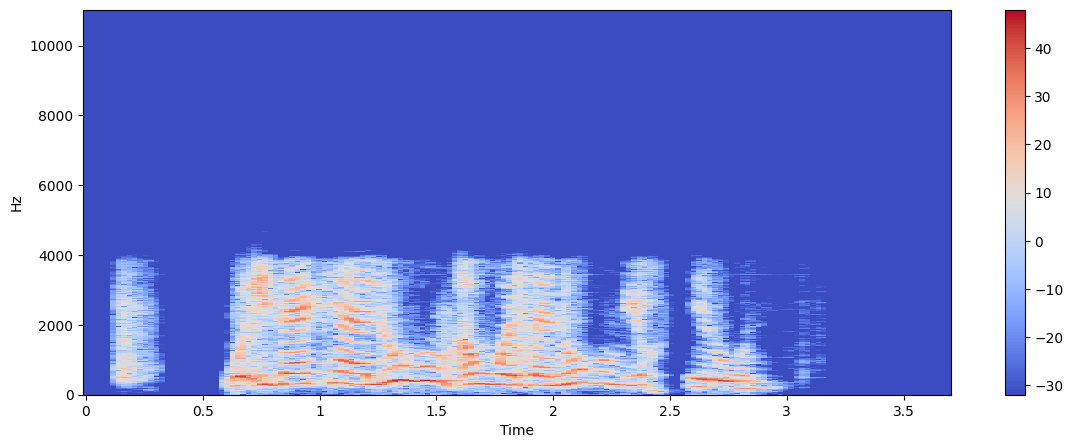

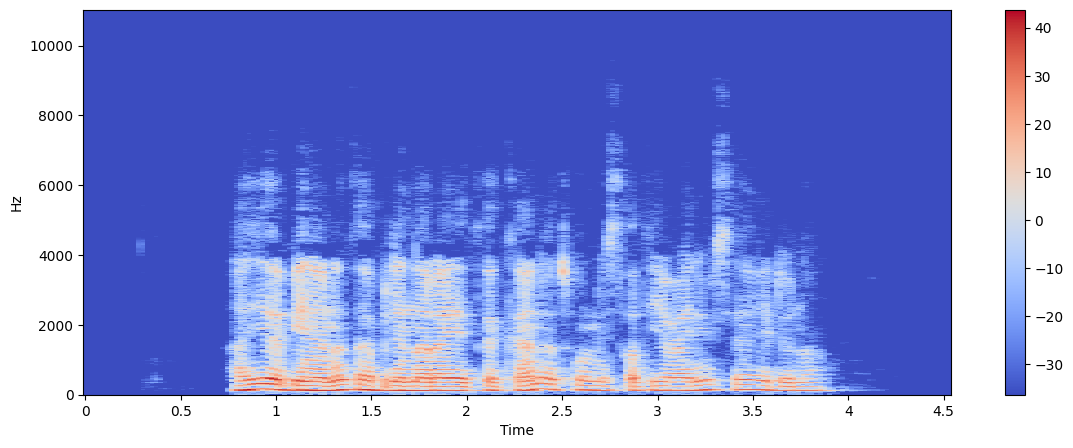

In [ ]:
for i in range(len(y)):
    X = librosa.stft(y[i])
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr[i], x_axis='time', y_axis='hz')
    plt.colorbar()

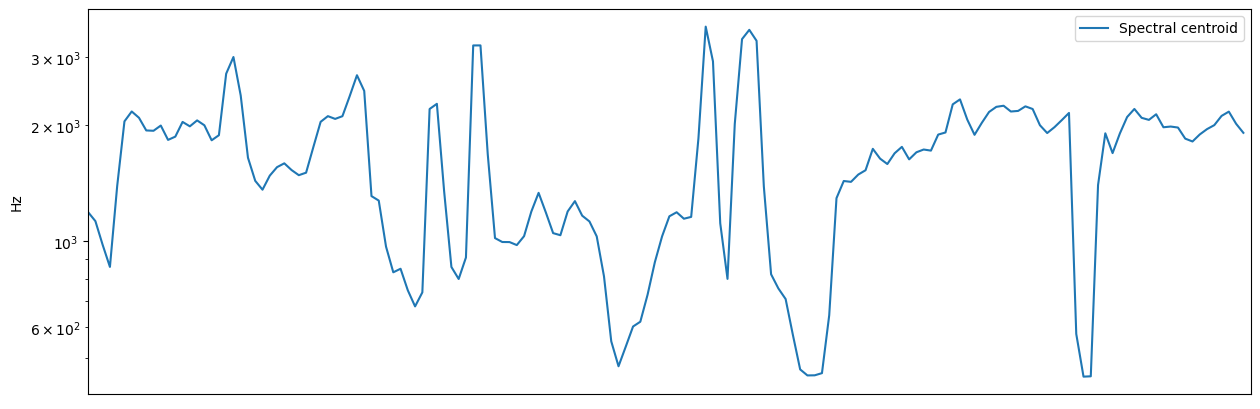

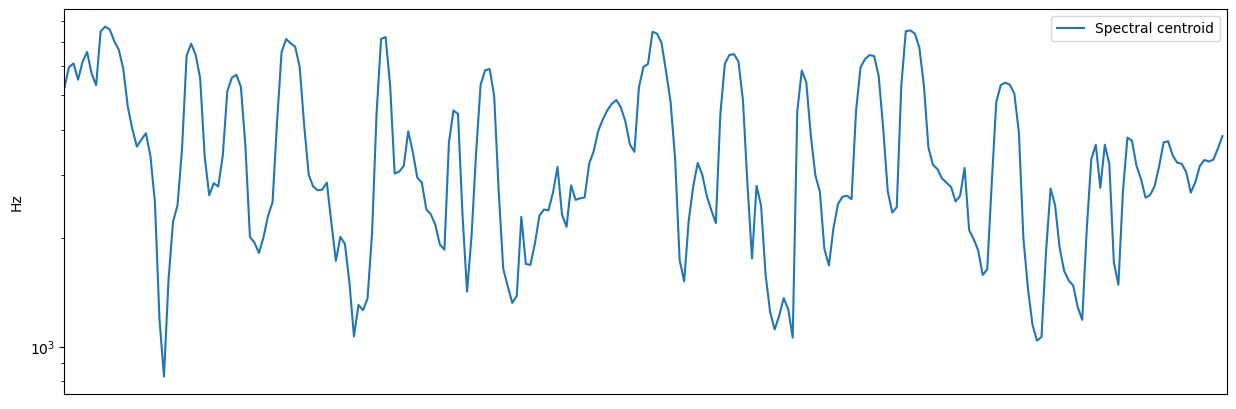

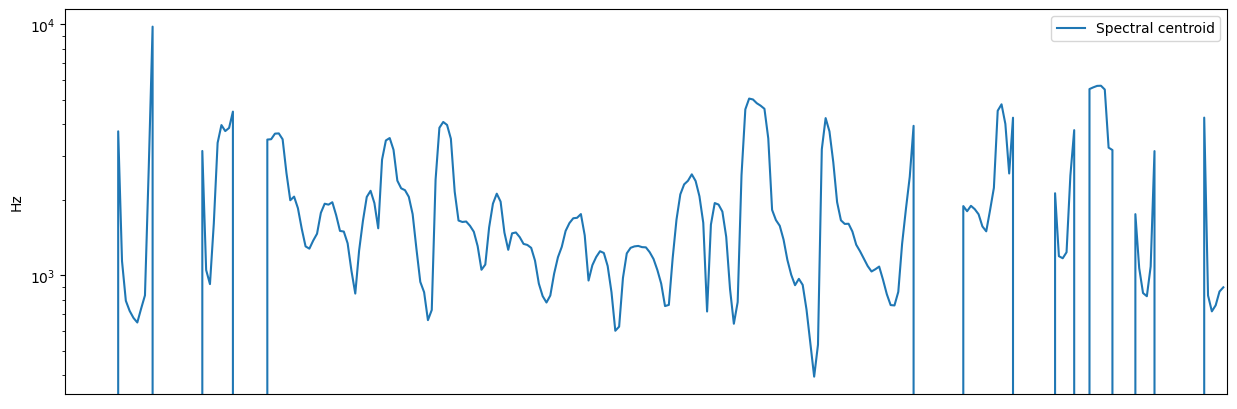

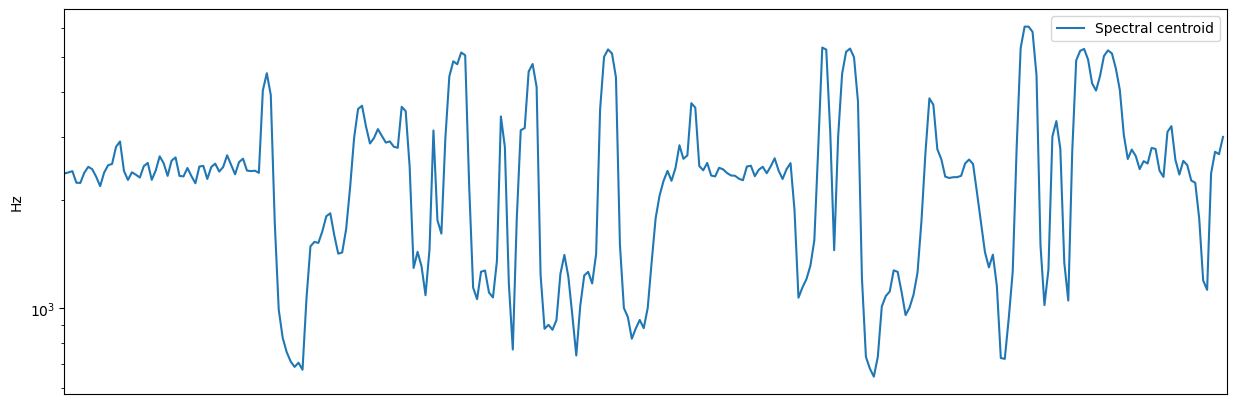

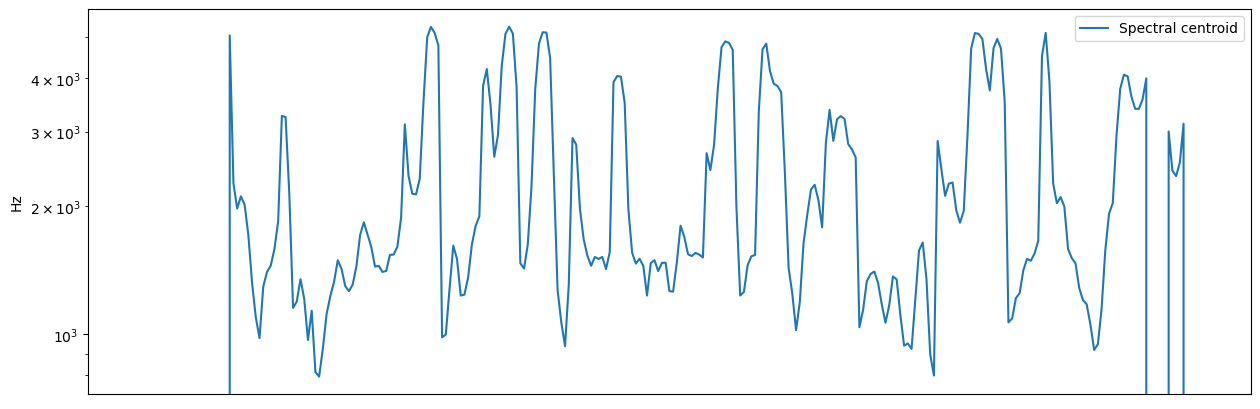

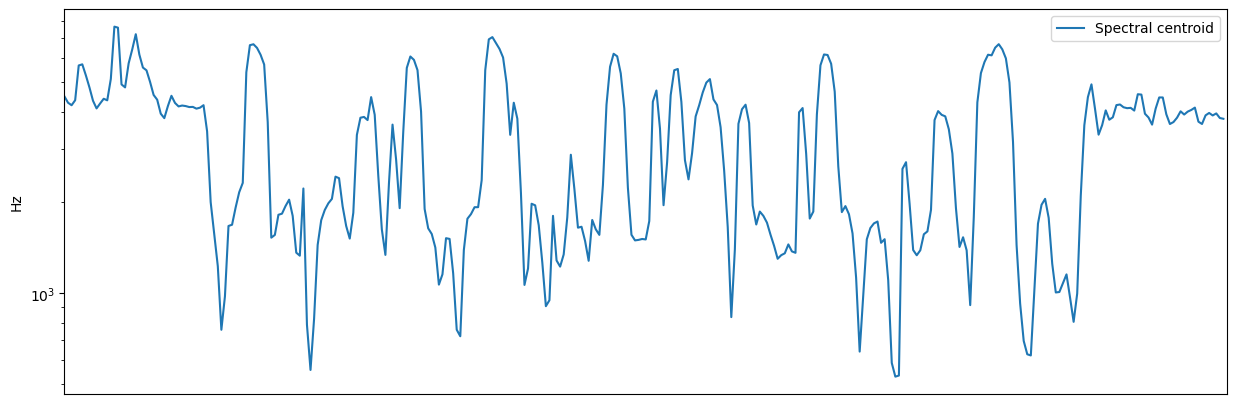

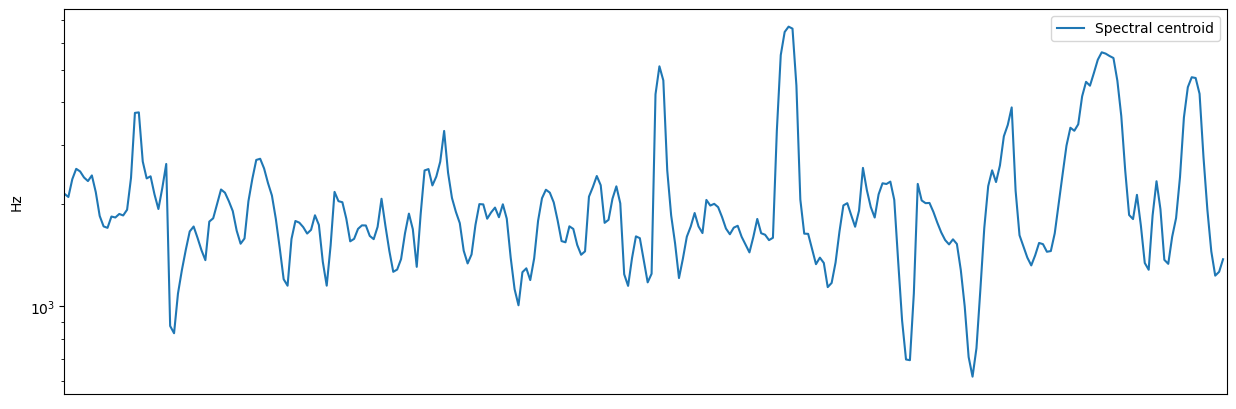

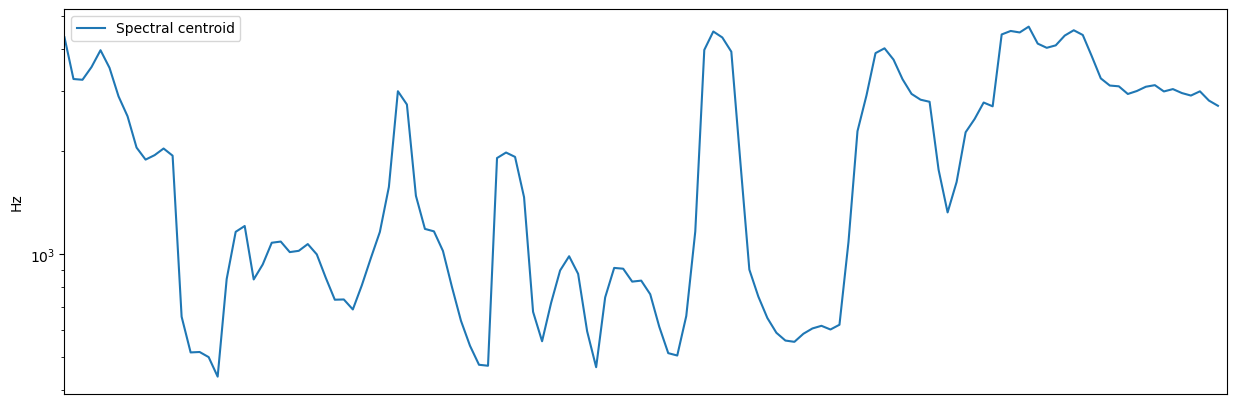

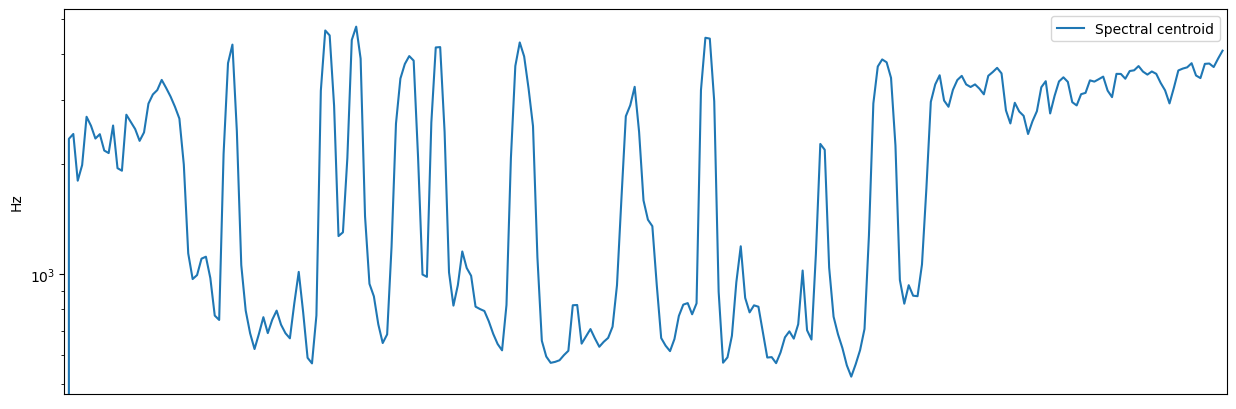

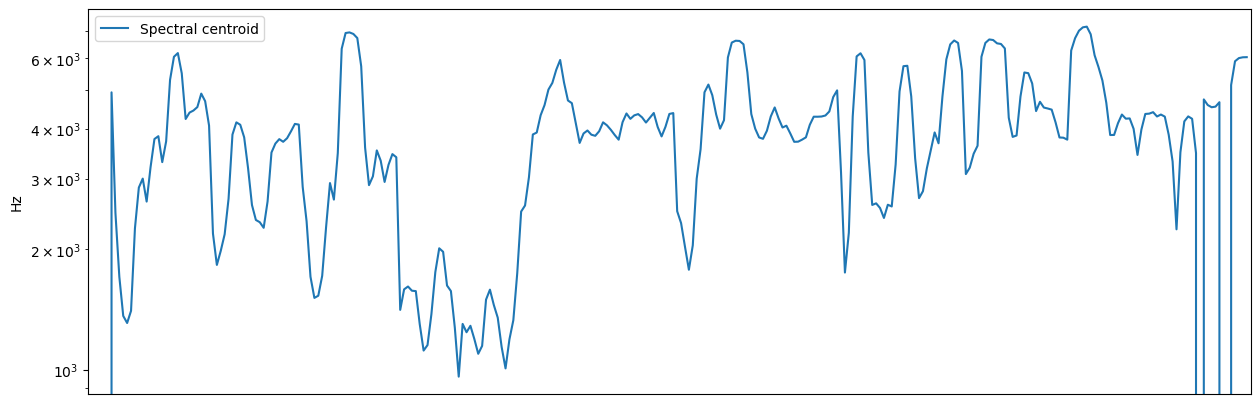

In [ ]:
for i in range(len(y)):
    cent = librosa.feature.spectral_centroid(y=y[i], sr=sr[i])
    plt.figure(figsize=(15,5))
    plt.subplot(1, 1, 1)
    plt.semilogy(cent.T, label='Spectral centroid')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, cent.shape[-1]])
    plt.legend()

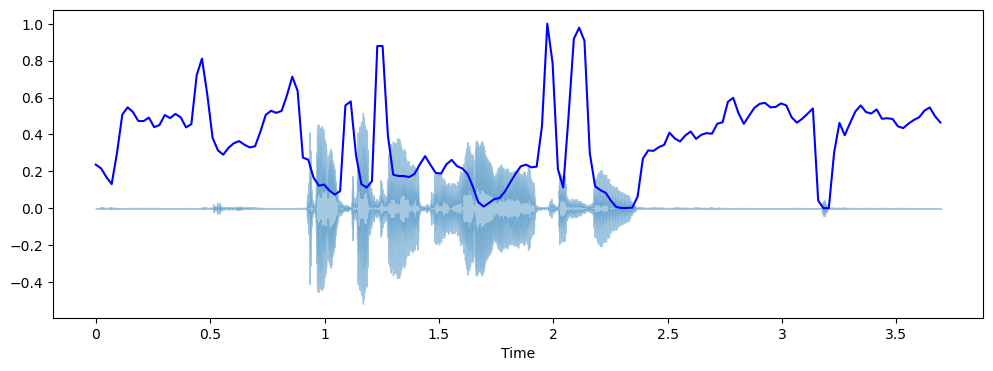

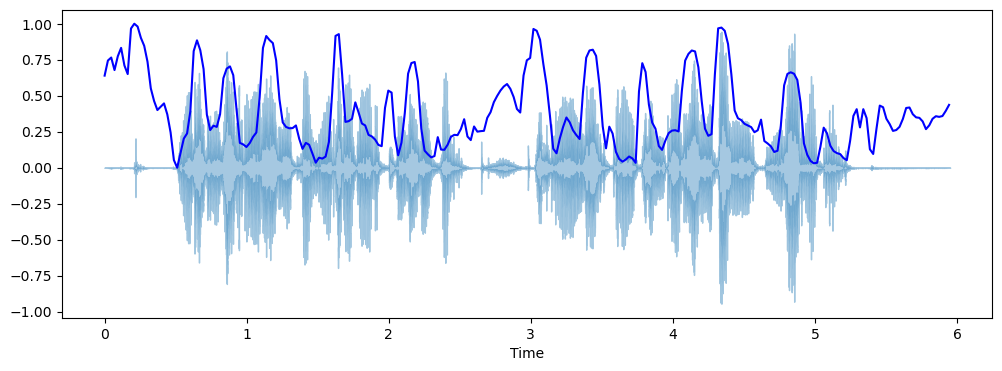

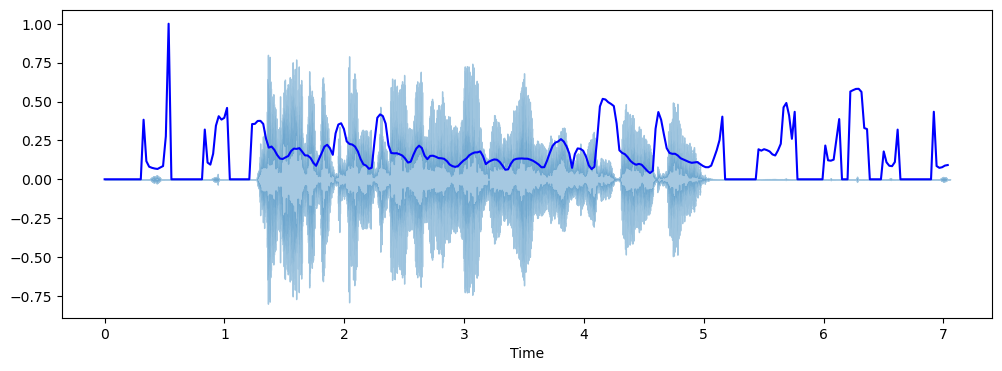

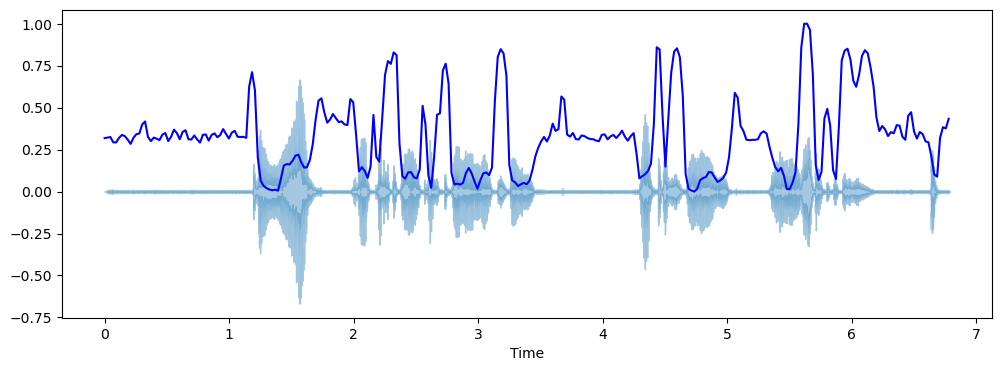

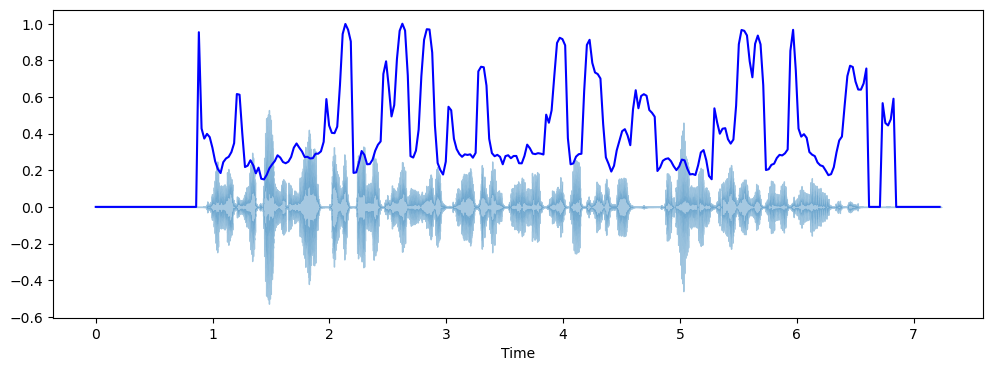

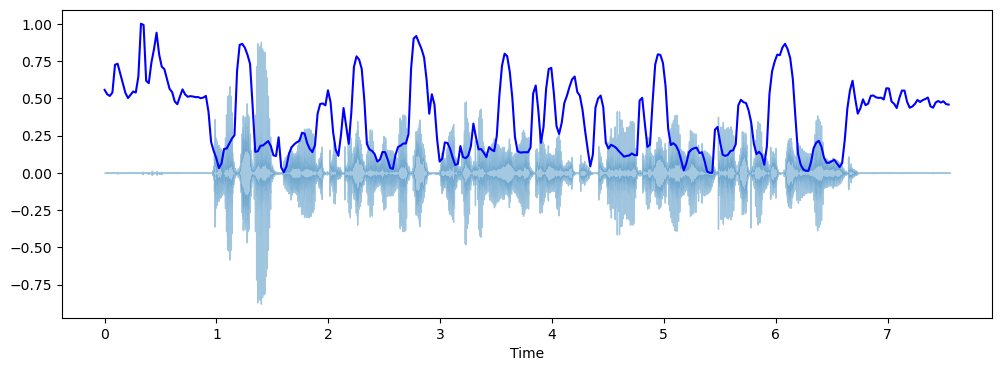

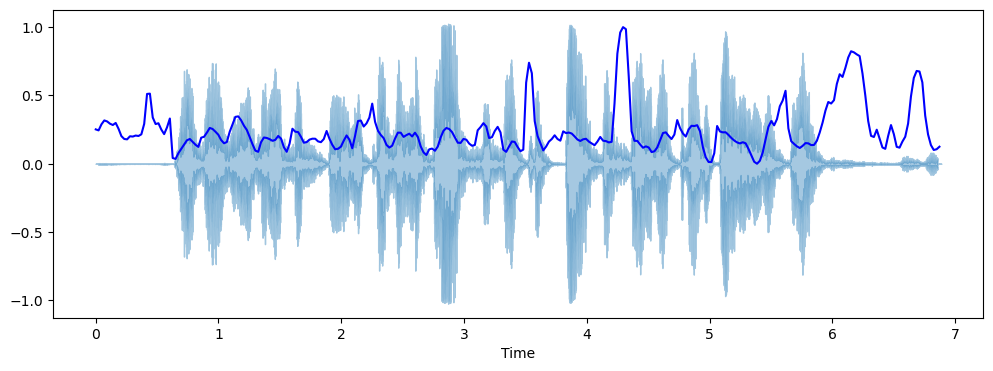

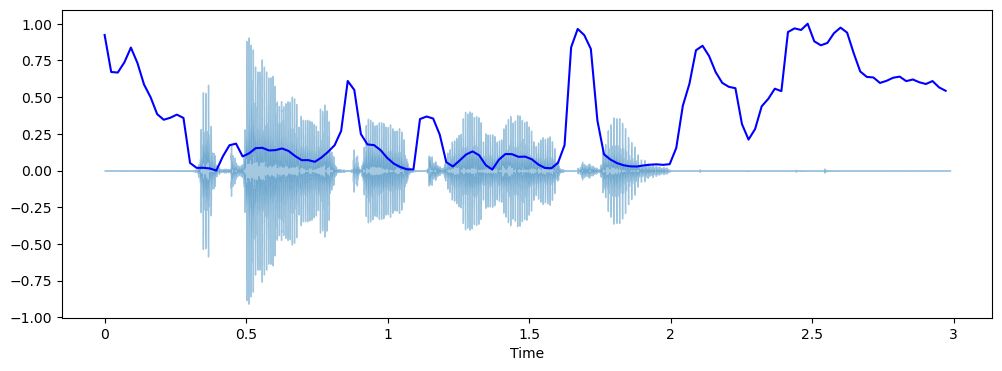

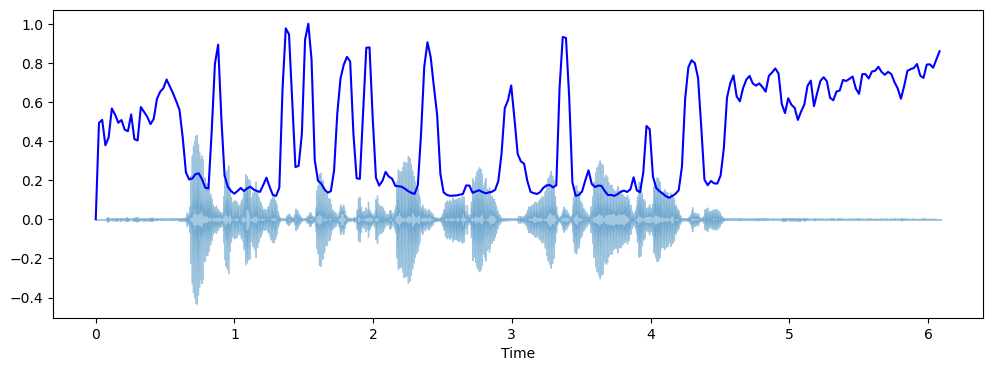

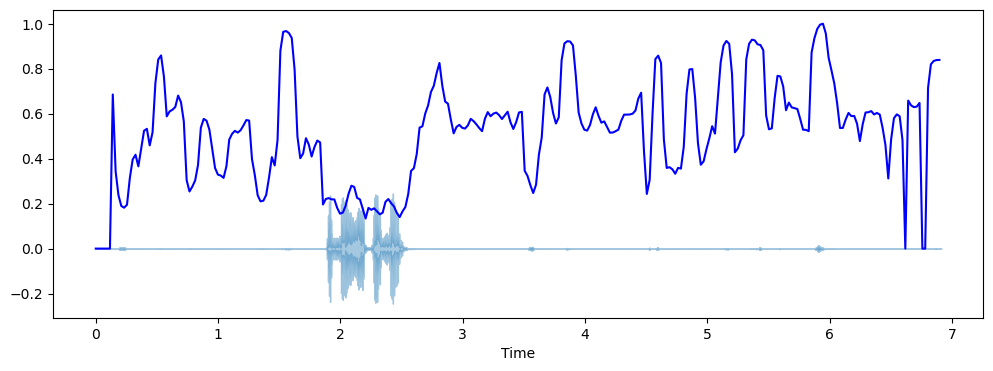

In [ ]:
import sklearn

def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

for i in range(len(y)):
    spectral_centroids = librosa.feature.spectral_centroid(y[i], sr=sr[i])[0]
    spectral_centroids.shape
    plt.figure(figsize=(12, 4))
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(y[i], sr=sr[i], alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='b')

In [ ]:
zero_crossings = librosa.zero_crossings(y[9000:10000], pad=False)
np.sum(zero_crossings)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
%%time
# Считывание файлов
path = 'audio'
langs = [path + '/' + i for i in os.listdir(path)[1:]]
langs
a = np.array([])
for i in os.listdir(langs[0])[:100]:
    y, sr = librosa.load(langs[0] + '/' + i)
    a = np.append(a, (y, sr))
a[:20]

CPU times: user 4.55 s, sys: 98.1 ms, total: 4.65 s
Wall time: 4.88 s


array([array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([-2.1480364e-09,  1.5066629e-08, -3.1801893e-08, ...,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
       22050, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([6.0500411e-06, 3.1076448e-05, 2.9863346e-05, ..., 0.0000000e+00,
              0.0000000e+00, 0.0000000e+00], dtype=float32)                   ,
       22050, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050,
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050],
      dtype=object)

In [ ]:
len(os.listdir(langs[0]))

74684

In [ ]:
def get_features(path):
    y, sr = librosa.load(path)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    beat_time_diff=np.ediff1d(beat_times)
    beat_nums = np.arange(1, np.size(beat_times))
    chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
    mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
    print('1', y, sr)
    print('2', y_harmonic, y_percussive)
    print('3', beat_times)
    print('4', beat_time_diff)
    print('5', beat_nums)
    print('6', chroma)
    print('7', mfccs)
    print('8', X)
    print('9', Xdb)
    print('10', cent)
    print('11', spectral_centroids)

get_features(langs[0] + '/' + i)

1 [0. 0. 0. ... 0. 0. 0.] 22050
2 [ 1.1305686e-09  9.2301089e-10 -3.3202795e-11 ...  6.5244509e-05
 -1.3878333e-04  5.4653046e-05] [-1.1306344e-09 -9.2308744e-10  3.3177742e-11 ... -6.5244327e-05
  1.3878336e-04 -5.4652843e-05]
3 [0.11609977 0.48761905 0.85913832 1.2306576  1.60217687 1.97369615]
4 [0.37151927 0.37151927 0.37151927 0.37151927 0.37151927]
5 [1 2 3 4 5]
6 [[0.43195048 0.42529753 0.41827738 ... 0.28814927 0.28703013 0.28597662]
 [0.27925092 0.28679627 0.29496247 ... 0.23803772 0.23865111 0.23925416]
 [0.25771278 0.2646072  0.27315363 ... 0.26271158 0.2636002  0.26445344]
 ...
 [0.38621128 0.3824918  0.37778682 ... 0.35582072 0.36190906 0.36812463]
 [0.24363628 0.24221645 0.24028891 ... 0.39552283 0.38830426 0.38085917]
 [0.3360682  0.33519578 0.3333503  ... 0.38340312 0.38505718 0.38738278]]
7 [[-6.6960480e+02 -6.6960480e+02 -6.6635358e+02 ... -5.1765839e+02
  -5.0714459e+02 -5.5524792e+02]
 [ 0.0000000e+00  0.0000000e+00  4.4197454e+00 ...  7.0790916e+01
   6.7822189e+01

часть с TensorFlow

In [11]:
data_dir = 'mini_dataset'

langs = np.array(tf.io.gfile.listdir(str(data_dir)))
# langs = np.where(langs != '.DS_Store', langs, None)
langs = langs[np.where(langs != '.DS_Store')]
langs

array(['english', 'russian', 'chinese', 'italian', 'arabic'], dtype='<U9')

In [12]:
filenames = tf.io.gfile.glob('mini_dataset' + '/*/*')
print(filenames[0])
filenames = tf.random.shuffle(filenames)
len(filenames)

mini_dataset/english/common_voice_en_37376287.mp3


12500

In [13]:
filenames[2]

<tf.Tensor: shape=(), dtype=string, numpy=b'mini_dataset/italian/common_voice_it_17435318.mp3'>

In [14]:
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir + '/' + langs[0]))))
print('Example file tensor:', filenames[0])

Number of examples per label: 2500
Example file tensor: tf.Tensor(b'mini_dataset/arabic/common_voice_ar_19083268.mp3', shape=(), dtype=string)


In [15]:
train_files = filenames[:5000]
val_files = filenames[len(train_files): len(train_files) + 2000]
test_files = filenames[len(train_files) + len(val_files):9000]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('test set size', len(test_files))

Training set size 5000
Validation set size 2000
test set size 2000


In [16]:
test_file = tf.io.read_file('mini_dataset/chinese/common_voice_zh-CN_18535251.mp3')
test_audio = tfio.audio.decode_mp3(test_file)
print(test_audio[:10, 0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [17]:
tf.squeeze(test_audio, axis=-1)

<tf.Tensor: shape=(389376,), dtype=float32, numpy=
array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        3.0092071e-05, -1.2869550e-06, -4.1256873e-05], dtype=float32)>

In [18]:
def get_audio(path):
  binary_audio = tf.io.read_file(path)
  audio = tfio.audio.decode_mp3(binary_audio)
  return tf.squeeze(audio, axis=-1)

In [19]:
def get_label(path):
  return tf.strings.split(input=path, sep=os.path.sep)[-2]

In [20]:
def get_audio_and_label(path):
  return get_audio(path), get_label(path)

In [21]:
get_audio_and_label('mini_dataset/chinese/common_voice_zh-CN_18535251.mp3')

(<tf.Tensor: shape=(389376,), dtype=float32, numpy=
 array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.0092071e-05, -1.2869550e-06, -4.1256873e-05], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'chinese'>)

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)
audio_ds = files_ds.map(
    map_func=get_audio_and_label,
    num_parallel_calls=AUTOTUNE
    )

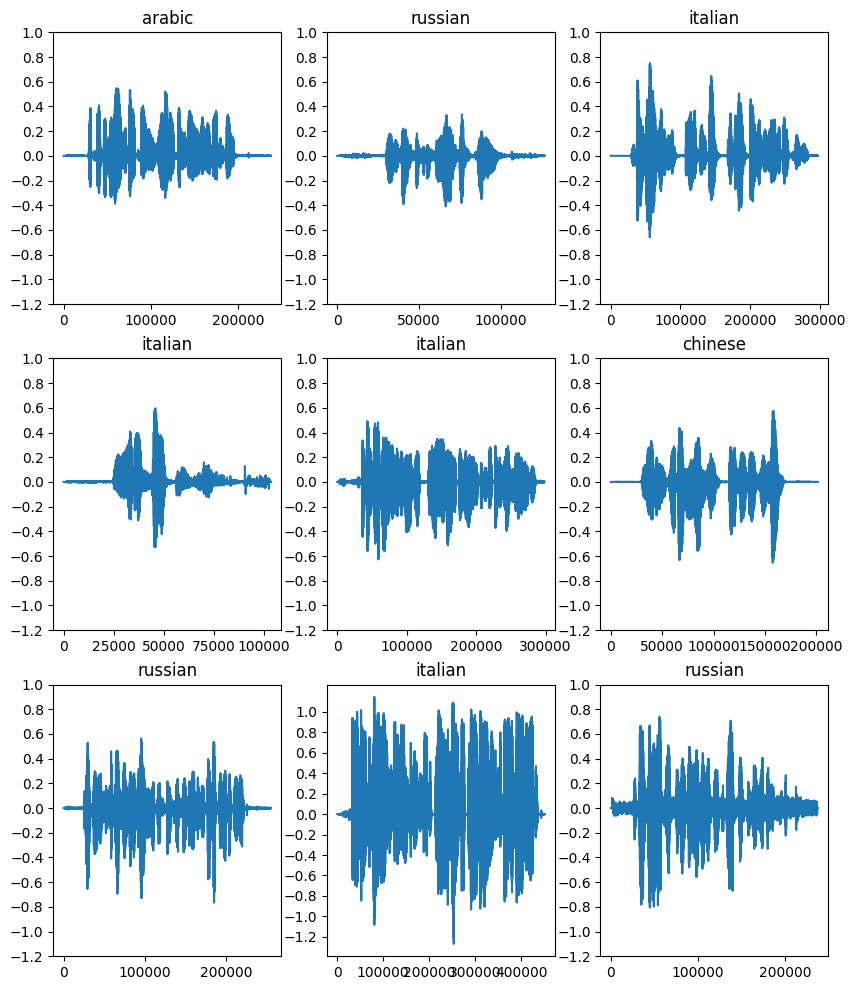

In [23]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(audio_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

In [24]:
def get_spectrogram(audio):
  input_len = 128000
  audio = audio[:input_len]
  zero_padding = tf.zeros(
      [128000] - tf.shape(audio),
      dtype=tf.float32)
  audio = tf.cast(audio, dtype=tf.float32)
  equal_length = tf.concat([audio, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  spectrogram = tf.abs(spectrogram)
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [25]:
get_spectrogram(get_audio('mini_dataset/chinese/common_voice_zh-CN_18535251.mp3'))

<tf.Tensor: shape=(999, 129, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[6.4178967e-01],
        [7.7866989e-01],
        [8.7898374e-01],
        ...,
        [1.3969072e-06],
        [2.3853497e-07],
        [7.1525574e-07]],

       [[4.2801353e-01],
        [4.1622877e-01],
        [4.4117090e-01],
        ...,
        [1.8316308e-06],
        [5.7054132e-07],
        [8.6426735e-07]],

       [[2.3642918e-01],
        [1.8578485e-01],
        [1.1287619e-01],
        ...,
        [1.5463723e

In [26]:
for audio, label in audio_ds.take(2):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(audio)

print('Label:', label)
print('audio shape:', audio.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(audio, rate=37000))

Label: russian
audio shape: (126720,)
Spectrogram shape: (999, 129, 1)
Audio playback


In [27]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

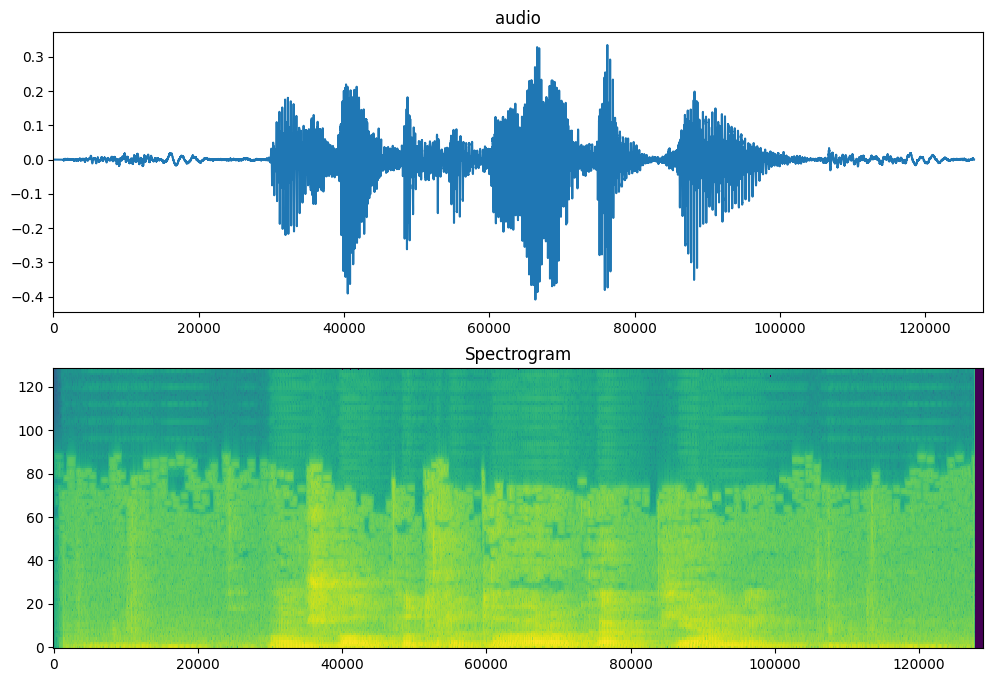

In [28]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(audio.shape[0])
axes[0].plot(timescale, audio.numpy())
axes[0].set_title('audio')
axes[0].set_xlim([0, 128000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [29]:
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  label_id = tf.argmax(label == langs)
  return spectrogram, label_id

In [30]:
get_spectrogram_and_label_id(audio, 'chinese')

(<tf.Tensor: shape=(999, 129, 1), dtype=float32, numpy=
 array([[[1.8971751e-07],
         [1.4324426e-07],
         [9.9253391e-08],
         ...,
         [2.7159873e-11],
         [5.1772697e-11],
         [1.2168755e-10]],
 
        [[5.5193136e-06],
         [2.9329412e-06],
         [1.5861526e-06],
         ...,
         [1.4012526e-10],
         [1.2451740e-10],
         [1.8144419e-10]],
 
        [[2.6440625e-06],
         [2.2740340e-05],
         [2.9723276e-05],
         ...,
         [2.2543649e-10],
         [1.6477786e-10],
         [2.8421709e-12]],
 
        ...,
 
        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],
 
        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],
 
        [[0.0000000e+00],
         [0.0000000e+00],
         [0.

In [31]:
spectrogram_ds = audio_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

In [32]:
j = 0
for i in spectrogram_ds:
  j += 1
  if j == 5:
    break
  print(i[1])

tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


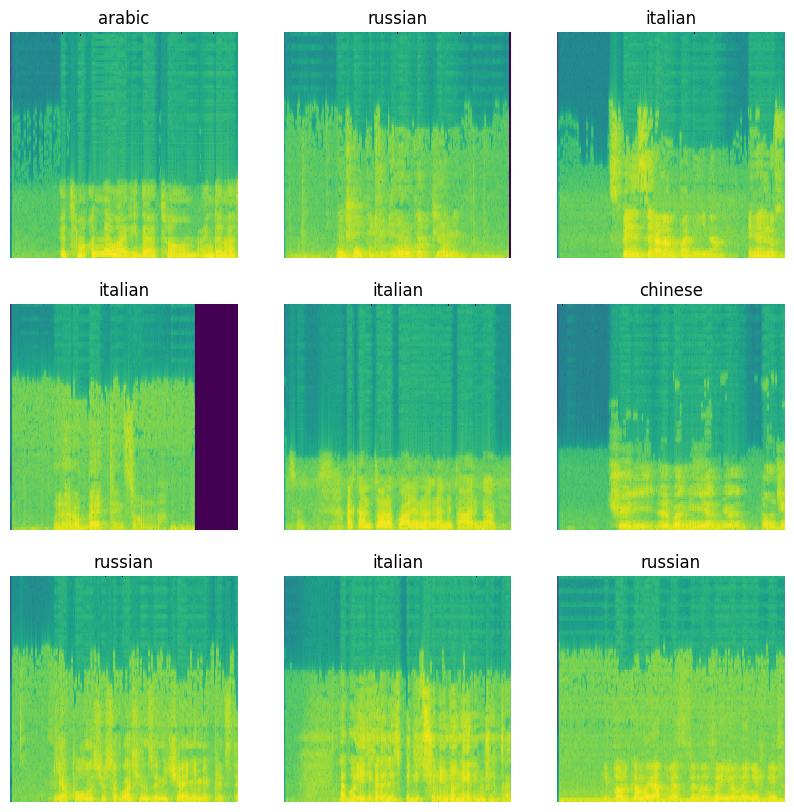

In [33]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(langs[label_id.numpy()])
  ax.axis('off')

plt.show()

In [34]:
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(
      map_func=get_audio_and_label,
      num_parallel_calls=AUTOTUNE)
  output_ds = output_ds.map(
      map_func=get_spectrogram_and_label_id,
      num_parallel_calls=AUTOTUNE)
  return output_ds

In [35]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [36]:
batch_size = 256
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [96]:
no_label_train_ds = train_ds.map(map_func=lambda spec, label: spec)

In [38]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(langs)

# norm_layer = layers.Normalization()
# norm_layer.adapt(data=no_label_train_ds)

Input shape: (999, 129, 1)


In [37]:
tf.expand_dims(input_shape, 0).shape.as_list()

[1, 3]

In [39]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Resizing(128, 128),
    # norm_layer,

    layers.Conv2D(32, 5),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Conv2D(32, 5),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Conv2D(32, 5),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),

    layers.MaxPooling2D(),
    layers.Conv2D(24, 3),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Conv2D(24, 3),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),

    layers.MaxPooling2D(),
    layers.Conv2D(16, 3),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Conv2D(16, 3),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.003)),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.003)),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.Dense(num_labels, kernel_regularizer=regularizers.l2(0.003))
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 124, 124, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 120, 120, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 120, 120, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 116, 116, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 116, 116, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 116, 116, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 58, 58, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 24)          │           6,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 56, 56, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 24)          │           5,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 54, 54, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 54, 54, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 16)          │           3,4

 Total params: 622,229 (2.37 MB)

 Trainable params: 621,493 (2.37 MB)

 Non-trainable params: 736 (2.88 KB)

In [93]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003, weight_decay=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [83]:
EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 248ms/step - accuracy: 0.2711 - loss: 2.3891 - val_accuracy: 0.2205 - val_loss: 2.2267
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.5218 - loss: 1.8428 - val_accuracy: 0.1930 - val_loss: 2.1939
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6611 - loss: 1.4952 - val_accuracy: 0.2295 - val_loss: 2.4254
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.7283 - loss: 1.2982 - val_accuracy: 0.3450 - val_loss: 2.0623
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.7678 - loss: 1.1794 - val_accuracy: 0.4840 - val_loss: 1.8824
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.7982 - loss: 1.0737 - val_accuracy: 0.7715 - val_loss: 1.1025
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.8187 - loss: 0.9988 - val_accuracy: 0.7835 - val_loss: 1.0422
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.8507 - loss: 0.9115 - val_accuracy: